# [프로젝트1] 철근 가격 데이터 분석

---


## 프로젝트 목표
---
- 시계열 데이터 분석 및 시각화
- 정규화, 윈도우 데이터셋 구축 등 시계열 데이터 전처리
- 시계열 데이터 예측 모형 구축, 추론 및 결과 시각화

## 프로젝트 목차
---

1. **데이터 읽기:** 철근 가격 데이터 읽기 및 DataFrame 생성

2. **데이터 정제:** Date 컬럼 index 지정. 주간 데이터 추출

3. **데이터 시각화:** 변수 시각화를 통하여 분포 파악

4. **데이터 전처리:** 딥러닝 모델에 필요한 입력값 형식으로 데이터 처리

5. **딥러닝 모델 정의:** PyTorch 라이브러리를 활용하여 LSTM 레이어를 활용한 모델 정의 및 생성

6. **딥러닝 모델 훈련:** 생성한 모델 훈련 및 검증

7. **추론 및 시각화:** 미래 데이터 결과 추론 및 추론 결과 시각화

## 1. 데이터 읽기
---
프로젝트에 활용할 데이터를 `Pandas`의 `read_excel()` 함수로 불러옵니다

### 1.1 라이브러리 불러오기

In [3]:
# 필요한 모듈 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Unicode warning 제거 (폰트 관련 경고메시지)
plt.rcParams['axes.unicode_minus']=False

# 한글 폰트 설정
# plt.rcParams['font.family'] = "AppleGothic"
plt.rcParams['font.family'] = "NanumGothic"

# 경고 메시지 출력 안함
warnings.filterwarnings('ignore')

# DataFrame 소수점 이하 넷째자리까지 표현
pd.set_option('display.float_format', lambda x: f'{x:.4f}') 

### 1.2 데이터 불러오기

#### **[TODO]** 데이터를 불러오는 코드를 작성해주세요.
- 데이터는 '/mnt/elice/dataset' 에 위치해있으며, 파일명은 '전처리Data.xlsx' 입니다. (파일명에서도 나타나있듯, xlsx 확장자를 갖습니다.)

In [4]:
import glob
# 파일 경로 맞는지 확인
glob.glob('/mnt/elice/dataset/*')
# * 해당` 데이터 셋 밑에 있는 모든 파일을 가져오라

['/mnt/elice/dataset/전처리Data.xlsx']

In [5]:
# 데이터 로드

# `/mnt/elice/dataset/전처리Data.xlsx` 파일을 불러오는 코드를 작성해주세요 
# 한글 인코딩 이슈를 방지하기 위해 위 주석에 있는 텍스트를 그대로 복사하여 사용해주세요.
df = pd.read_excel('/mnt/elice/dataset/전처리Data.xlsx')
# 데이터 형태
print(df.shape)
# 상위 10개 행 조회
df.head(10)

(937, 13)


,Date,고철 중량A (구좌업체매입가) [한국(국내가)] 현물KRW/ton,고철 H2 [일본(FOB)] 현물KRW/ton,고철 HMS No.1 [미국(한국 CFR)] 현물KRW/ton,철근 고장력 HD10mm [한국(출고가)] 현물KRW/ton,철근 고장력 HD10mm [한국(국내 중국산)] 현물KRW/ton,철근 고장력 HD10mm [한국(1차 유통가)] 현물KRW/ton,판매량(천톤),재고량(천톤),"허가 면적(철근)(단위 : 1,000 ㎡)","착공 면적(철근)(단위 : 1,000 ㎡)",동절기,장마기
0,2013-01-04,42.5000,45.0100,47.5700,77.0000,64.0000,69.0000,662,317,12.4700,10.2500,1,0
1,2013-01-07,42.5000,43.9100,46.1800,75.0000,64.0000,69.0000,662,317,12.4700,10.2500,1,0
2,2013-01-11,43.5000,44.4400,47.2700,75.0000,64.0000,69.0000,662,317,12.4700,10.2500,1,0
3,2013-01-14,43.5000,45.3700,45.7400,75.0000,64.0000,69.0000,662,317,12.4700,10.2500,1,0
4,2013-01-18,42.3000,46.7200,47.2500,75.0000,64.0000,69.0000,662,317,12.4700,10.2500,1,0
5,2013-01-21,42.3000,47.5600,45.9100,75.0000,64.0000,69.0000,662,317,12.4700,10.2500,1,0
6,2013-01-25,41.9000,48.7300,47.2200,75.0000,64.0000,69.0000,662,317,12.4700,10.2500,1,0
7,2013-01-28,41.9000,48.2900,47.8000,75.0000,65.0000,70.0000,662,317,12.4700,10.2500,1,0
8,2013-02-01,41.2000,48.6100,48.3800,75.0000,65.0000,70.0000,449,320,12.4700,10.2500,1,0
9,2013-02-04,41.2000,46.3100,48.8500,75.0000,66.0000,71.0000,449,320,12.4700,10.2500,1,0


## 2. 데이터 정제
---
- `Date` 컬럼을 index로 지정합니다.
- 주간 데이터를 추출합니다.

### 2.1 Date 인덱스 지정하기
#### **[TODO]** df Dataframe에 있는 'Date' 칼럼을 index로 지정해 주세요.

In [6]:
# Date 컬럼을 index로 지정

# df Dataframe에 있는 'Date' 칼럼을 index로 지정해 주세요.
df = df.set_index('Date')
df.head()

,고철 중량A (구좌업체매입가) [한국(국내가)] 현물KRW/ton,고철 H2 [일본(FOB)] 현물KRW/ton,고철 HMS No.1 [미국(한국 CFR)] 현물KRW/ton,철근 고장력 HD10mm [한국(출고가)] 현물KRW/ton,철근 고장력 HD10mm [한국(국내 중국산)] 현물KRW/ton,철근 고장력 HD10mm [한국(1차 유통가)] 현물KRW/ton,판매량(천톤),재고량(천톤),"허가 면적(철근)(단위 : 1,000 ㎡)","착공 면적(철근)(단위 : 1,000 ㎡)",동절기,장마기
Date,,,,,,,,,,,,
2013-01-04,42.5000,45.0100,47.5700,77.0000,64.0000,69.0000,662,317,12.4700,10.2500,1,0
2013-01-07,42.5000,43.9100,46.1800,75.0000,64.0000,69.0000,662,317,12.4700,10.2500,1,0
2013-01-11,43.5000,44.4400,47.2700,75.0000,64.0000,69.0000,662,317,12.4700,10.2500,1,0
2013-01-14,43.5000,45.3700,45.7400,75.0000,64.0000,69.0000,662,317,12.4700,10.2500,1,0
2013-01-18,42.3000,46.7200,47.2500,75.0000,64.0000,69.0000,662,317,12.4700,10.2500,1,0


In [7]:
df.loc['2013-01-11']
# Date를 인덱스로 설정함으로써 해당 행의 데이터를 날짜를 지정하여 쉽게 가져올 수 O

고철 중량A (구좌업체매입가) [한국(국내가)] 현물KRW/ton    43.5000
고철 H2 [일본(FOB)] 현물KRW/ton               44.4400
고철 HMS No.1 [미국(한국 CFR)] 현물KRW/ton      47.2700
철근 고장력 HD10mm [한국(출고가)] 현물KRW/ton       75.0000
철근 고장력 HD10mm [한국(국내 중국산)] 현물KRW/ton    64.0000
철근 고장력 HD10mm [한국(1차 유통가)] 현물KRW/ton    69.0000
판매량(천톤)                                662.0000
재고량(천톤)                                317.0000
허가 면적(철근)(단위 : 1,000 ㎡)                 12.4700
착공 면적(철근)(단위 : 1,000 ㎡)                 10.2500
동절기                                      1.0000
장마기                                      0.0000
Name: 2013-01-11 00:00:00, dtype: float64

### 2.2 주(Weekly) 단위의 데이터만 추출

date_range()를 통해 일정 단위별로 데이터를 생성할 때, freq 인자에 넣을 수 있는 텍스트의 종류 중 일부입니다.

s: 초

T: 분

H: 시간

D: 일(day)

B: 주말이 아닌 평일

W: 주(일요일)

W-MON: 주(월요일)

M: 각 달(month)의 마지막 날

MS: 각 달의 첫날

BM: 주말이 아닌 평일 중에서 각 달의 마지막 날

BMS: 주말이 아닌 평일 중에서 각 달의 첫날

WOM-2THU: 각 달의 두번째 목요일

Q-JAN: 각 분기의 첫달의 마지막 날

#### **[TODO]** 주간(Weekly) 데이터만 추출하기 위하여 date_range()를 주 단위로 생성합니다.


In [8]:
# 주간(Weekly) 데이터만 추출하기 위하여 date_range()를 주 단위로 생성합니다.
# pd.date_range('시작일자', '종료일자', freq='주기')
target_index = pd.date_range('20130107', '20211227', freq='W-MON')
target_index

DatetimeIndex(['2013-01-07', '2013-01-14', '2013-01-21', '2013-01-28',
               '2013-02-04', '2013-02-11', '2013-02-18', '2013-02-25',
               '2013-03-04', '2013-03-11',
               ...
               '2021-10-25', '2021-11-01', '2021-11-08', '2021-11-15',
               '2021-11-22', '2021-11-29', '2021-12-06', '2021-12-13',
               '2021-12-20', '2021-12-27'],
              dtype='datetime64[ns]', length=469, freq='W-MON')

In [9]:
# index가 target_index를 포함하는 경우만(isin) 추출합니다
df = df.loc[df.index.isin(target_index)]
df

,고철 중량A (구좌업체매입가) [한국(국내가)] 현물KRW/ton,고철 H2 [일본(FOB)] 현물KRW/ton,고철 HMS No.1 [미국(한국 CFR)] 현물KRW/ton,철근 고장력 HD10mm [한국(출고가)] 현물KRW/ton,철근 고장력 HD10mm [한국(국내 중국산)] 현물KRW/ton,철근 고장력 HD10mm [한국(1차 유통가)] 현물KRW/ton,판매량(천톤),재고량(천톤),"허가 면적(철근)(단위 : 1,000 ㎡)","착공 면적(철근)(단위 : 1,000 ㎡)",동절기,장마기
Date,,,,,,,,,,,,
2013-01-07,42.5000,43.9100,46.1800,75.0000,64.0000,69.0000,662,317,12.4700,10.2500,1,0
2013-01-14,43.5000,45.3700,45.7400,75.0000,64.0000,69.0000,662,317,12.4700,10.2500,1,0
2013-01-21,42.3000,47.5600,45.9100,75.0000,64.0000,69.0000,662,317,12.4700,10.2500,1,0
2013-01-28,41.9000,48.2900,47.8000,75.0000,65.0000,70.0000,662,317,12.4700,10.2500,1,0
2013-02-04,41.2000,46.3100,48.8500,75.0000,66.0000,71.0000,449,320,12.4700,10.2500,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-29,58.3000,56.8800,61.5200,92.8000,98.0000,104.0000,901,163,17.0700,13.3700,0,0
2021-12-06,57.6000,56.5300,60.9300,96.6000,98.5000,104.6000,827,201,17.0700,13.3700,1,0
2021-12-13,57.1000,51.9300,60.7200,96.6000,98.5000,104.6000,827,201,17.0700,13.3700,1,0


### 2.3 철근 고장력 HD10mm [한국(출고가)] 현물KRW/ton 컬럼 선택

#### **[TODO]** 철근 고장력 HD10mm [한국(출고가)] 현물KRW/ton 컬럼 을 선택하여 series 변수에 추출합니다.
- Hint. 해당 컬럼은 index 3 에 있습니다.    

In [10]:
df.head(3)

,고철 중량A (구좌업체매입가) [한국(국내가)] 현물KRW/ton,고철 H2 [일본(FOB)] 현물KRW/ton,고철 HMS No.1 [미국(한국 CFR)] 현물KRW/ton,철근 고장력 HD10mm [한국(출고가)] 현물KRW/ton,철근 고장력 HD10mm [한국(국내 중국산)] 현물KRW/ton,철근 고장력 HD10mm [한국(1차 유통가)] 현물KRW/ton,판매량(천톤),재고량(천톤),"허가 면적(철근)(단위 : 1,000 ㎡)","착공 면적(철근)(단위 : 1,000 ㎡)",동절기,장마기
Date,,,,,,,,,,,,
2013-01-07,42.5000,43.9100,46.1800,75.0000,64.0000,69.0000,662,317,12.4700,10.2500,1,0
2013-01-14,43.5000,45.3700,45.7400,75.0000,64.0000,69.0000,662,317,12.4700,10.2500,1,0
2013-01-21,42.3000,47.5600,45.9100,75.0000,64.0000,69.0000,662,317,12.4700,10.2500,1,0


In [11]:
# df에서 철근 고장력 HD10mm [한국(출고가)] 현물KRW/ton 컬럼 을 선택하여 series 변수에 추출합니다.
# df.iloc[:(행 모두 갖고 오고), 3(열 3번째)]
series = df.iloc[:, 3]
series

Date
2013-01-07   75.0000
2013-01-14   75.0000
2013-01-21   75.0000
2013-01-28   75.0000
2013-02-04   75.0000
               ...  
2021-11-29   92.8000
2021-12-06   96.6000
2021-12-13   96.6000
2021-12-20   96.6000
2021-12-27   96.6000
Name: 철근 고장력 HD10mm [한국(출고가)] 현물KRW/ton, Length: 468, dtype: float64

## 3. 데이터 시각화

### 3.1 가격 데이터 시각화

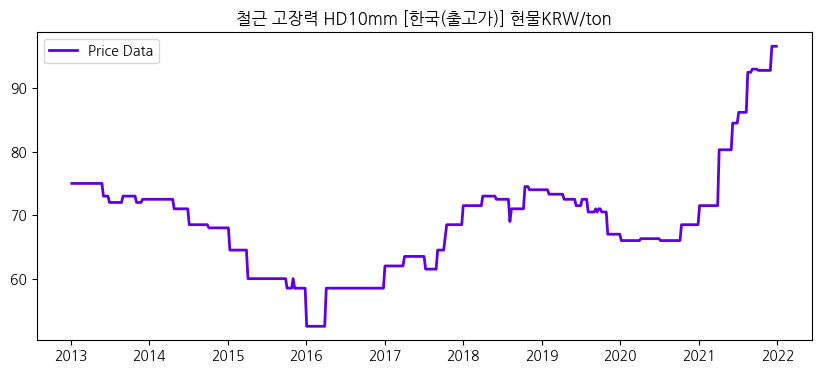

In [12]:
# 가격 데이터 시각화
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 4)
ax.plot(series, color='#6100E0', linewidth=2.0, label='Price Data')
ax.set_title(series.name)
ax.legend()
plt.show()

## 4. 데이터 전처리
---
- 가격 데이터 정규화
- 윈도우 데이터셋 구성

### 4.1 가격 데이터 정규화

#### **[TODO]** scikit-learn의 Min Max Scaler를 활용해서 `series` 변수를 정규화 및 변환 합니다.
- `reshape` 함수를 활용하여 차원을 1D 에서 2D로 1차원 늘려줍니다. 

In [13]:
# 정규화(Normalization) 수행
from sklearn.preprocessing import MinMaxScaler

# scikit-learn의 MinMaxScaler를 정의```하여 scaler 변수에 할당합니다.
scaler = MinMaxScaler()

In [14]:
series.values.ndim
# fit_transform 2차원 필요 -> reshape(-1,1)

1

In [15]:
# series를 변환하되, 1D -> 2D 차원을 1차원 늘려준 뒤 변환합니다
scaled_series = scaler.fit_transform(series.values.reshape(-1, 1))

# 5개 데이터 출력 (numpy array)
scaled_series[:5]

array([[0.51020408],
       [0.51020408],
       [0.51020408],
       [0.51020408],
       [0.51020408]])

In [16]:
# 제대로 정규화되었는지 보기 위해서
pd.DataFrame(scaled_series).describe()
# min 0, max 1 -> 제대로 됐구낭~~

,0
count,468.0000
mean,0.3719
std,0.1884
min,0.0000
25%,0.2494
50%,0.3628
75%,0.4535
max,1.0000


### 4.2 시계열 데이터셋 구성 (Windowed Dataset)

In [17]:
def make_dataset(series, window_size=6):
    # Xs: 학습 데이터, Ys: 예측 데이터
    Xs = []
    Ys = []
    for i in range(len(series) - window_size):
        Xs.append(series.iloc[i:i+window_size].values)
        Ys.append(series.iloc[i+window_size])
    return np.array(Xs), np.array(Ys)

#### **[TODO]** 데이터셋을 생성하는 코드를 작성합니다.

In [18]:
# 데이터셋을 생성하는 코드를 작성합니다.
# make_dataset() 에 1차원 들어가야 하니까 flatten()
Xs, Ys = make_dataset(pd.Series(scaled_series.flatten()), window_size = 6)

# 결과 형태(shape)를 확인합니다
Xs.shape, Ys.shape

((462, 6), (462,))

5개의 임의의 index로 추출하여 잘 구성이 되었는지 확인합니다.

In [19]:
print(Xs[-15:-10])
# 연속된 6일치가 한 세트 window
# 간격 1이니까 첫 번째 행의 두 번째 원소 0.90802948 이 두 번째 행의 첫 번째 원소

[[0.76417234 0.90702948 0.90702948 0.90702948 0.91836735 0.91836735]
 [0.90702948 0.90702948 0.90702948 0.91836735 0.91836735 0.91836735]
 [0.90702948 0.90702948 0.91836735 0.91836735 0.91836735 0.91836735]
 [0.90702948 0.91836735 0.91836735 0.91836735 0.91836735 0.9138322 ]
 [0.91836735 0.91836735 0.91836735 0.91836735 0.9138322  0.9138322 ]]


In [20]:
print(Ys[-15:-10])
# Xs의 각 행의 맨 마지막 원소로 구성

[0.91836735 0.91836735 0.9138322  0.9138322  0.9138322 ]


`np.expand_dims()`

- 시계열 데이터 생성을 위한 차원 추가 `(number of dataset, window_size, features)`

In [21]:
Xs.shape

(462, 6)

In [22]:
# 맨 끝에(-1) 차원을 1개 추가 후 shape 확인
np.expand_dims(Xs, -1).shape
# 맨 마지막 차원은 하나의 가격(Feature 1)을 맞추기 때문

(462, 6, 1)

In [23]:
Xs = np.expand_dims(Xs, -1)
Xs.shape, Ys.shape

((462, 6, 1), (462,))

### 4.3 데이터셋 분할

- 마지막 45개의 데이터는 검증용 데이터셋으로 나머지 데이터를 학습용 데이터셋으로 활용
- `train`: 학습용 데이터셋
- `test`: 검증용 데이터셋

In [24]:
# 데이터셋 분할
x_train, y_train = Xs[:-45], Ys[:-45]
x_test, y_test = Xs[-45:], Ys[-45:]

In [25]:
# train 데이터셋 shape 확인 (N, Window_size, Feature #), (Target,)
x_train.shape, y_train.shape

((417, 6, 1), (417,))

In [26]:
# test 데이터셋 shape 확인 (N, W, F), (Target,)
x_test.shape, y_test.shape

((45, 6, 1), (45,))

### 4.4 텐서 데이터셋

- 딥러닝 모델에 배치 단위로 데이터셋을 주입하기 위하여 TensorDataset 생성

In [27]:
import torch

# device(학습시킬 환경) 설정 (cuda 혹은 cpu)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [28]:
# FloatTensor 변환을 위한 함수
# 변환하고 device(cpu) 위에 올려서(to(device)) 학습 진행
def make_tensor(x, device):
    return torch.FloatTensor(x).to(device)

In [29]:
# FloatTensor 형태로 (train, test) 데이터셋 변환
x_train = make_tensor(x_train, device=device)
y_train = make_tensor(y_train, device=device)
x_test = make_tensor(x_test, device=device)
y_test = make_tensor(y_test, device=device)

`torch.utils.data.TensorDataset` 로 변환하는 이유
- X, Y 데이터를 묶어서 지도학습용 데이터셋으로 생성
- 배치(Batch) 구성을 위하여 `DataLoader`로 변환하기 위함

In [30]:
# TensorDataset 생성
train = torch.utils.data.TensorDataset(x_train, y_train)
test = torch.utils.data.TensorDataset(x_test, y_test)

In [31]:
train

배치 구성을 위한 `torch.utils.data.DataLoader`를 생성합니다.

In [32]:
# batch_size 설정
BATCH_SIZE = 32

# train_loader, test_loader 생성
train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=BATCH_SIZE, 
                                           shuffle=False)

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=BATCH_SIZE, 
                                          shuffle=False)

In [33]:
# 1개 batch 추출
x, y = next(iter(train_loader))

In [34]:
# x, y 데이터 shape 확인 (batch_size, window_size, features)
x.shape, y.shape

(torch.Size([32, 6, 1]), torch.Size([32]))

## 5. 딥러닝 모델 정의
---
LSTM을 활용한 시계열 예측 모형을 생성합니다.

### 5.1 모델 정의에 필요한 모듈 import

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim

### 5.2 LSTM 입출력

In [36]:
input_size = 1 # 1 feature(가격 데이터)
hidden_size = 32 # 간단한 모델이라면 작은 값
num_layers = 1 # LSTM layer 1개만 사용

lstm = nn.LSTM(input_size=input_size, 
               hidden_size=hidden_size, 
               num_layers=num_layers, 
               bidirectional=False,
               batch_first=True)

LSTM **입력 데이터** 정의

In [37]:
# (batch_size, window_size, input_size)
x = torch.zeros(32, 6, 1)
x.shape

torch.Size([32, 6, 1])

LSTM 출력

In [38]:
# LSTM 출력 확인
lstm_out, (h, c) = lstm(x)
# h : hidden state 단기 / c: cell state 장기

In [39]:
# lstm_out: (batch_size 32, window_size 6, hidden_size 32*bidirectional 1(False))
# h       : (bidirectional 1*num_layers 1, batch_size 32, hidden_size 32)
# c       : (bidirectional*num_layers, batch_size, hidden_size)
lstm_out.shape, h.shape, c.shape

(torch.Size([32, 6, 32]), torch.Size([1, 32, 32]), torch.Size([1, 32, 32]))

LSTM -> bidirectional=True

In [40]:
lstm_nbi = nn.LSTM(input_size=input_size, 
               hidden_size=hidden_size, 
               num_layers=num_layers, 
               bidirectional=True,
               batch_first=True)

In [41]:
# LSTM 출력 확인
lstm_nbi_out, (h, c) = lstm_nbi(x)
# h : hidden state 단기 / c: cell state 장기

In [42]:
# lstm_out: (batch_size 32, window_size 6, hidden_size 32*bidirectional 2(True))
# h       : (bidirectional 2*num_layers 1, batch_size 32, hidden_size 32)
# c       : (bidirectional*num_layers, batch_size, hidden_size)
lstm_nbi_out.shape, h.shape, c.shape

(torch.Size([32, 6, 64]), torch.Size([2, 32, 32]), torch.Size([2, 32, 32]))

LSTM -> num_layers = 3

In [43]:
lstm_n3 = nn.LSTM(input_size=input_size, 
               hidden_size=hidden_size, 
               num_layers=3, 
               bidirectional=True,
               batch_first=True)

In [44]:
# LSTM 출력 확인
lstm_n3_out, (h, c) = lstm_n3(x)
# h : hidden state 단기 / c: cell state 장기

In [45]:
# lstm_out: (batch_size 32, window_size 6, hidden_size 32*bidirectional 2(True))
# h       : (bidirectional 2*num_layers 3, batch_size 32, hidden_size 32)
# c       : (bidirectional*num_layers, batch_size, hidden_size)
lstm_n3_out.shape, h.shape, c.shape

(torch.Size([32, 6, 64]), torch.Size([6, 32, 32]), torch.Size([6, 32, 32]))

In [46]:
lstm_n3_out[:, -1, :].shape

torch.Size([32, 64])

### 5.3 모델 정의

#### **[TODO]** 철근 가격 데이터 처리를 위한 LSTM 모델을 정의해주세요.
1. LSTM 
	- 입력 크기: `input_size`
	- 은닉층 크기: `hidden_size`
	- 레이어 수: `num_layers`
	- 양방향 여부: `bidirectional`
	- 모델을 정의할 때, `batch_first=True` 인자를 포함시켜주세요.
2. 출력층
	- 입력 크기: `hidden_size * self.bidirectional`
	- 출력 크기: `output_size`


In [47]:
# 모델 정의
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers, bidirectional=False):
        super(LSTMModel, self).__init__()
        
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.bidirectional = 2 if bidirectional else 1
        
        # LSTM 정의
        # 철근 가격 데이터 처리를 위한 LSTM 모델을 정의해주세요
        self.lstm = nn.LSTM(input_size=input_size,
                            hidden_size=hidden_size, 
                            num_layers=num_layers, 
                            bidirectional=bidirectional,
                            batch_first=True)
        
        # 출력층 정의 (Linear)
        # 철근 가격 예측을 위한 출력층을 정의해주세요
        self.fc = nn.Linear(in_features = hidden_size * self.bidirectional,
                            out_features = output_size)
        
    def reset_hidden_state(self, batch_size):
        # hidden state, cell state (bidirectional*num_layers, batch_size, hidden_size)
        self.hidden = (
            # hidden state 단기기억 초기화
            torch.zeros(self.bidirectional*self.num_layers, batch_size, self.hidden_size),
            # cell state 장기기억 초기화
            torch.zeros(self.bidirectional*self.num_layers, batch_size, self.hidden_size)
        )
        
    def forward(self, x):
        # LSTM
        # 코드입력
        output, (h, c) = self.lstm(x, self.hidden)
        # 출력층으로 (맨 끝 Cell의 출력 결과만) 리턴하는 출력층을 정의해주세요
        # window_size = 6 즉, 6일치 데이터 다 쓰는게 아니라, 마지막 날의 64개 feature 사용
        output = self.fc(output[:, -1, :])
        return output

In [48]:
# 모델 생성
model = LSTMModel(input_size=1, hidden_size=32, output_size=1, num_layers=1, bidirectional=False)

In [49]:
# batch_size를 입력 값으로 대입하여 초기화
model.reset_hidden_state(1)

In [50]:
# batch dimension 추가
inputs = np.expand_dims(x_train[0], 0)
inputs.shape

(1, 6, 1)

In [51]:
# model에 입력 데이터 대입 후 출력 확인
model(torch.FloatTensor(inputs))
# 다음날 1일 가격 예측

tensor([[-0.1164]], grad_fn=<AddmmBackward0>)

## 6. 딥러닝 모델 훈련
---
- 손실함수, 옵티마이저 등 모델 훈련에 설정할 하이퍼파라미터를 정의합니다.
- 모델을 훈련(training) 합니다.

### 6.1 하이퍼파라미터 정의
- 손실함수, 학습율 (Learning rate), 옵티마이저를 정의합니다.

#### **[TODO]** 손실함수를 정의해서 `loss_fn` 에 할당해주세요.

In [52]:
# 손실함수 (HuberLoss) 를 정의해주세요
loss_fn = nn.HuberLoss()

# 학습율
lr = 1e-4

# Epoch
num_epochs = 1000

# 옵티마이저
optimizer = optim.Adam(model.parameters(), lr=lr)

### 6.2 훈련

#### **[TODO]** 주석과 영상의 안내에 따라, 모델을 훈련시키는 함수를 완성해주세요.

In [53]:
training_losses = [] 
validation_losses = []

for epoch in range(num_epochs):
    # 훈련, 검증 손실 
    training_loss = 0.0
    validation_loss = 0.0
    
    # 훈련 모드
    model.train()
    
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)
        # 옵티마이저 그라디언트 초기화
        optimizer.zero_grad()
        
        # 모델 hidden state 초기화
        model.reset_hidden_state(len(x))
        
        # 모델의 추론값을 output 변수에 할당하는 코드를 작성해주세요.
        output = model(x)
        
        # 훈련 데이터에 대한 손실값을 loss 변수에 할당하는 코드를 작성해주세요.
        loss = loss_fn(output, y)
        
        # 손실값의 역전파를 위해 손실 값의 미분값을 계산하는 코드를 작성해주세요.
        loss.backward()
        
        # optimizer를 활용해서 그라디언트 업데이트 (역전파) 를 수행하는 코드를 작성해주세요.
        optimizer.step()
        
        # 훈련 손실 누적
        training_loss += loss.item()*len(x)
    # 평균 훈련 손실
    avg_training_loss = training_loss / len(train_loader)
    training_losses.append(avg_training_loss)

    # 검증 모드
    model.eval()
    
    # 그라디언트 추적 Off
    with torch.no_grad():
        for x, y in test_loader:
            x, y = x.to(device), y.to(device)
            # 모델 hidden state 초기화
            model.reset_hidden_state(len(x))
            
            # 모델의 추론값을 output 변수에 할당하는 코드를 작성해주세요.
            output = model(x)
            
            # 검증 데이터에 대한 손실값을 loss 변수에 할당하는 코드를 작성해주세요.
            val_loss = loss_fn(output, y)
            
            # 검증 손실 누적
            validation_loss += val_loss.item()*len(x)

    avg_validation_loss = validation_loss / len(test_loader)
    validation_losses.append(avg_validation_loss)
    
    if epoch % 50 == 0:
        print(f'epoch: {epoch+1:03d}, loss: {avg_training_loss:.4f}, val_loss: {avg_validation_loss:.4f}')

epoch: 001, loss: 3.1416, val_loss: 8.7387
epoch: 051, loss: 0.1872, val_loss: 1.7038
epoch: 101, loss: 0.1468, val_loss: 1.3177
epoch: 151, loss: 0.1033, val_loss: 0.8969
epoch: 201, loss: 0.0643, val_loss: 0.5282
epoch: 251, loss: 0.0512, val_loss: 0.4320
epoch: 301, loss: 0.0506, val_loss: 0.4356
epoch: 351, loss: 0.0507, val_loss: 0.4368
epoch: 401, loss: 0.0507, val_loss: 0.4372
epoch: 451, loss: 0.0508, val_loss: 0.4377
epoch: 501, loss: 0.0508, val_loss: 0.4381
epoch: 551, loss: 0.0508, val_loss: 0.4385
epoch: 601, loss: 0.0508, val_loss: 0.4389
epoch: 651, loss: 0.0508, val_loss: 0.4392
epoch: 701, loss: 0.0508, val_loss: 0.4396
epoch: 751, loss: 0.0508, val_loss: 0.4399
epoch: 801, loss: 0.0508, val_loss: 0.4402
epoch: 851, loss: 0.0508, val_loss: 0.4405
epoch: 901, loss: 0.0508, val_loss: 0.4408
epoch: 951, loss: 0.0508, val_loss: 0.4411


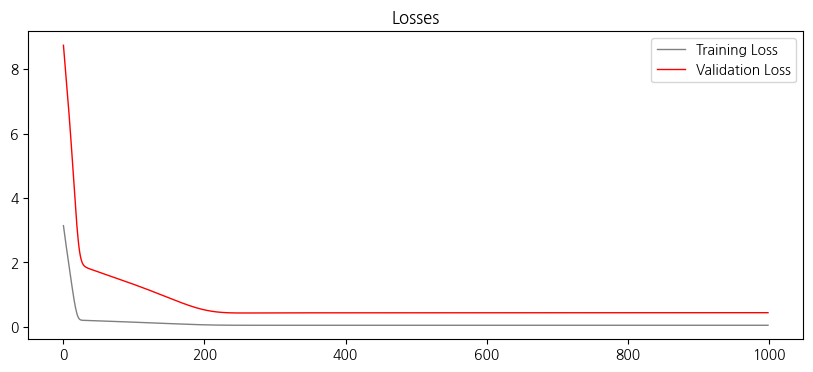

In [54]:
# 학습/검증 손실 시각화
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 4)
ax.plot(training_losses, color='grey', linewidth=1.0, label='Training Loss')
ax.plot(validation_losses, color='red', linewidth=1.0, label='Validation Loss')
ax.set_title('Losses')
ax.legend()
plt.show()

## 7. 추론 및 시각화

### 7.1 추론

#### **[TODO]** 주석과 영상의 안내에 따라, 모델을 테스트하는 코드를 완성해주세요.

In [55]:
preds = [] # 예측값
y_trues = [] # 실제값

# 검증 모드 활성화
model.eval()

# 그라디언트 추적 Off
with torch.no_grad():
    for x, y in test_loader:
        x, y = x.to(device), y.to(device)
        model.reset_hidden_state(len(x))
        # 모델의 추론값을 output 변수에 할당하는 코드를 작성해주세요.
        output = model(x)
        
        # output과 y true 정규화(0~1)해줬던 값을 inverse_transform()으로 원래 가격 복원
        pred = scaler.inverse_transform(output.detach().numpy())
        y_true = scaler.inverse_transform(y.detach().numpy().reshape(-1, 1))
        
        # preds, y_trues에 복원된 값 추가
        preds.extend(pred.tolist())
        y_trues.extend(y_true.tolist())

In [56]:
preds

[[71.11833190917969],
 [71.11833190917969],
 [71.11833190917969],
 [71.11833190917969],
 [71.11833190917969],
 [71.11833190917969],
 [71.11833190917969],
 [72.56394958496094],
 [74.19148254394531],
 [75.89594268798828],
 [77.58567810058594],
 [79.1598129272461],
 [80.51030731201172],
 [80.51030731201172],
 [80.51030731201172],
 [80.51030731201172],
 [81.19866180419922],
 [81.99252319335938],
 [82.84049987792969],
 [83.69324493408203],
 [84.76425170898438],
 [85.75943756103516],
 [86.10206604003906],
 [86.45024871826172],
 [86.77800750732422],
 [87.05657958984375],
 [88.04264068603516],
 [89.18717193603516],
 [90.42475128173828],
 [91.76189422607422],
 [93.0448989868164],
 [94.16716003417969],
 [94.26588439941406],
 [94.33170318603516],
 [94.37937927246094],
 [94.34156036376953],
 [94.30207824707031],
 [94.26402282714844],
 [94.23125457763672],
 [94.23125457763672],
 [94.23125457763672],
 [94.23125457763672],
 [94.78179931640625],
 [95.42281341552734],
 [96.1263427734375]]

In [57]:
y_trues

[[71.5],
 [71.5],
 [71.5],
 [71.5],
 [71.5],
 [71.5],
 [80.30000305175781],
 [80.30000305175781],
 [80.30000305175781],
 [80.30000305175781],
 [80.30000305175781],
 [80.30000305175781],
 [80.30000305175781],
 [80.30000305175781],
 [80.30000305175781],
 [84.5],
 [84.5],
 [84.5],
 [84.5],
 [86.19999694824219],
 [86.19999694824219],
 [86.19999694824219],
 [86.19999694824219],
 [86.19999694824219],
 [86.19999694824219],
 [92.49999237060547],
 [92.49999237060547],
 [92.49999237060547],
 [93.0],
 [93.0],
 [93.0],
 [93.0],
 [92.79999542236328],
 [92.79999542236328],
 [92.79999542236328],
 [92.79999542236328],
 [92.79999542236328],
 [92.79999542236328],
 [92.79999542236328],
 [92.79999542236328],
 [92.79999542236328],
 [96.5999984741211],
 [96.5999984741211],
 [96.5999984741211],
 [96.5999984741211]]

### 7.2 추론 결과 시각화

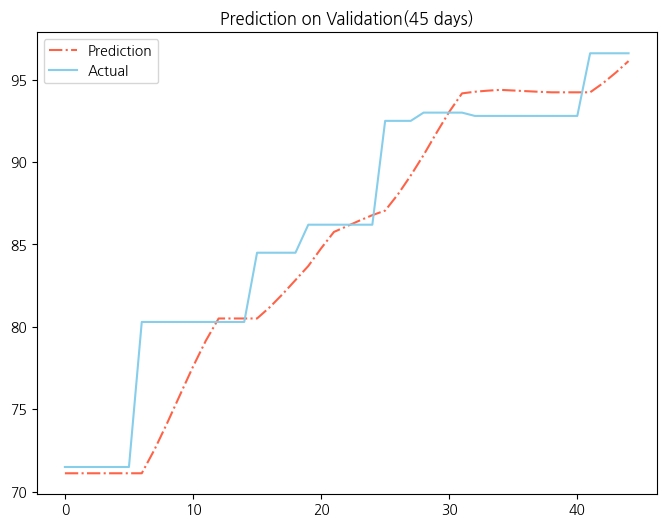

In [58]:
# 45일 간의 추론 vs 실제 가격 시각화
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(8, 6)
ax.plot(preds, label='Prediction', color='tomato', linestyle='-.')
ax.plot(y_trues, label='Actual', color='skyblue')
ax.legend()
ax.set_title('Prediction on Validation(45 days)')
plt.show()

### 7.3 전체 데이터에 대한 추론 및 시각화

#### **[TODO]** 주석과 영상의 안내에 따라, 학습 데이터에 대한 추론 결과를 시각화 하는 코드를 완성해주세요.

In [59]:
preds = []
y_trues = []

# 검증 모드 활성화
model.eval()

# 그라디언트 추적 Off
with torch.no_grad():
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)
        model.reset_hidden_state(len(x))
        
        # 모델의 추론값을 output 변수에 할당하는 코드를 작성해주세요.
        output = model(x)
        
        # output과 y true inverse transform으로 원래 가격 복원
        pred = scaler.inverse_transform(output.detach().numpy())
        y_true = scaler.inverse_transform(y.detach().numpy().reshape(-1, 1))
        
        # preds, y_trues에 복원된 값 추가
        preds.extend(pred.tolist())
        y_trues.extend(y_true.tolist())

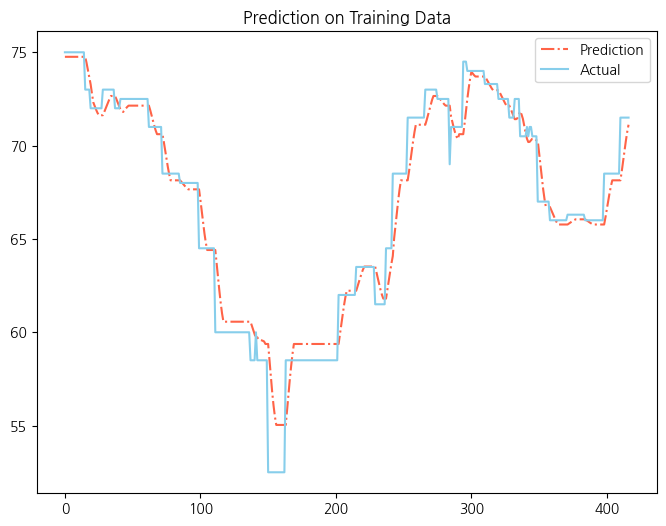

In [60]:
# Training Data 추론 vs 실제 가격 시각화
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(8, 6)
ax.plot(preds, label='Prediction', color='tomato', linestyle='-.')
ax.plot(y_trues, label='Actual', color='skyblue')
ax.legend()
ax.set_title('Prediction on Training Data')
plt.show()